In [1]:
import os
import os.path as osp
import subprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from osgeo import gdal

# HRRR Rain Data Test

The purpose of this notebook is to investigate precipitation fields from HRRR that are all zero. The bands we seek are "PRATE", the precipitation rate, and "APCP", total accumulated precipitation. HRRR band numbers [definitions](https://www.nco.ncep.noaa.gov/pmb/products/hrrr/):
* 3D Pressure Levels ([source](https://www.nco.ncep.noaa.gov/pmb/products/hrrr/hrrr.t00z.wrfprsf00.grib2.shtml)):
    * `PRATE`: 628
    * `APCP`: 629
* Native Levels ([source](https://www.nco.ncep.noaa.gov/pmb/products/hrrr/hrrr.t00z.wrfnatf00.grib2.shtml)):
    * `PRATE`: 1053
    * `APCP`: 1054
* 2D Surface Levels ([source](https://www.nco.ncep.noaa.gov/pmb/products/hrrr/hrrr.t00z.wrfsfcf00.grib2.shtml)):
    * `PRATE`: 083
    * `APCP`: 084
 
Server of grib files linked from NOAA to: https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/

    - *NOTE:* this url provides an html interface for current and previous day. The urls to the grib files for older days should still work for data, but the file directories cannot be viewed in a browser

## Rain Data All Zero in HRRR

In [2]:
base_url = "https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20240313/conus/"

In [3]:
url = base_url + "/hrrr.t00z.wrfprsf00.grib2"
print(f"Reading {url}")
ds = gdal.Open('/vsicurl/' + url)
band_number = 628
band = ds.GetRasterBand(band_number)
data = band.ReadAsArray()

# Close the dataset
ds = None

Reading https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20240313/conus//hrrr.t00z.wrfprsf00.grib2


In [4]:
print(f"Unique vals: {np.unique(data)}")

Unique vals: [0.]


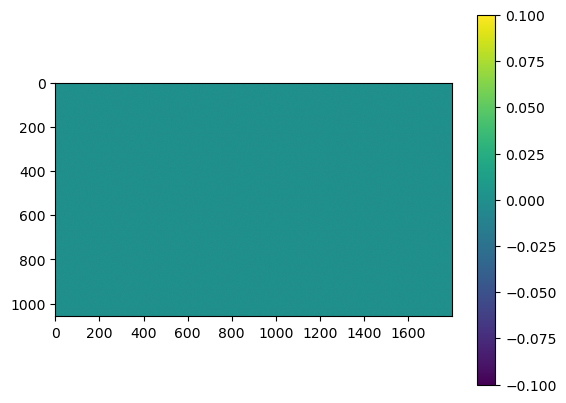

In [5]:
plt.imshow(data)
plt.colorbar()

Its zero for other model levels...

In [6]:
url = base_url + "/hrrr.t00z.wrfsfcf00.grib2"
print(f"Reading {url}")
ds = gdal.Open('/vsicurl/' + url)
band_number = 83
band = ds.GetRasterBand(band_number)
data = band.ReadAsArray()

# Close the dataset
ds = None

print(f"Unique vals: {np.unique(data)}")

Reading https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20240313/conus//hrrr.t00z.wrfsfcf00.grib2
Unique vals: [0.]


In [7]:
url = base_url + "/hrrr.t00z.wrfnatf00.grib2"
print(f"Reading {url}")
ds = gdal.Open('/vsicurl/' + url)
band_number = 1053
band = ds.GetRasterBand(band_number)
data = band.ReadAsArray()

# Close the dataset
ds = None

print(f"Unique vals: {np.unique(data)}")

Reading https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20240313/conus//hrrr.t00z.wrfnatf00.grib2
Unique vals: [0.]


## Other Bands Ok

In [8]:
url = base_url + "/hrrr.t00z.wrfprsf00.grib2"
ds = gdal.Open('/vsicurl/' + url)
band_number = 585 # Wind gust
band = ds.GetRasterBand(band_number)
data = band.ReadAsArray()

# Close the dataset
ds = None

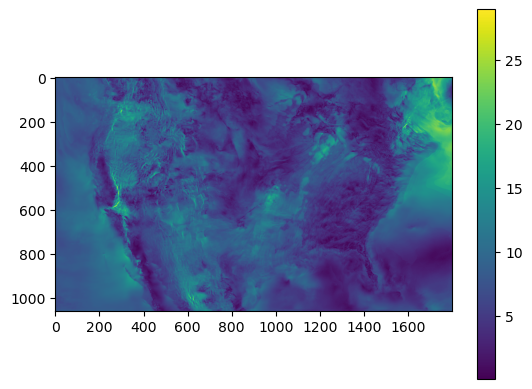

In [9]:
plt.imshow(data)
plt.colorbar()